In [9]:
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
 
from fingerprints import *

In [10]:
# img = cv2.imread('DB1_B/101_2.tif', cv2.IMREAD_GRAYSCALE)
img = cv2.imread(f'{parentdir}/DB1_B/107_2.tif', cv2.IMREAD_GRAYSCALE)
enhanced_and_binarized_img = enhance_and_binarize(img)
_, binarized_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
preprocessed_img = preprocess(enhanced_and_binarized_img)
thinned_img = thin(preprocessed_img)
terminations = extract_ridge(thinned_img, ridge_terminations_kernel)
bifurcations = extract_ridge(thinned_img, ridge_bifurcations_kernel)
fin_img, fin_list = postprocessing(terminations, bifurcations)
show_minutiae = enhanced_and_binarized_img.copy()
show_minutiae = cv2.cvtColor(show_minutiae, cv2.COLOR_GRAY2BGR)
for (i,j) in fin_list:
    cv2.circle(show_minutiae,(j,i), 4, (255,0,0), cv2.LINE_4)

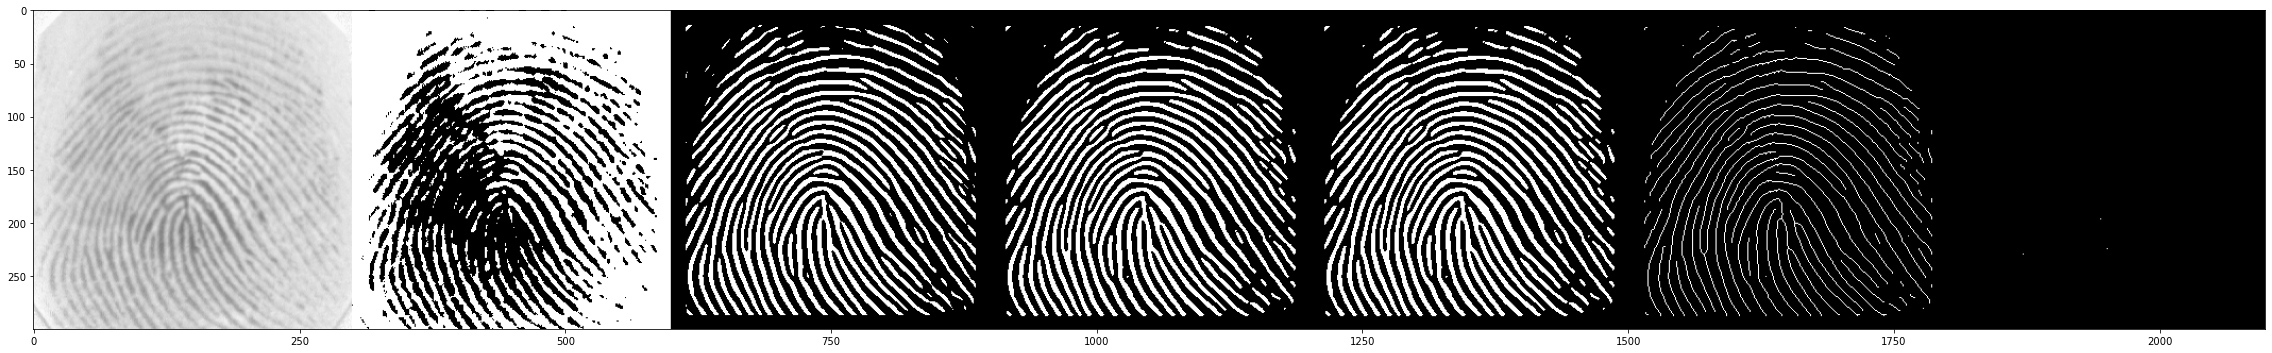

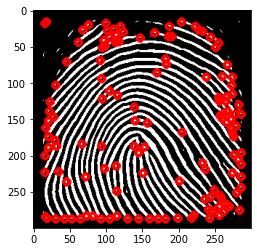

In [11]:
plt.figure(figsize=(40,10))
plt.figure(1)
plt.imshow(np.concatenate((img, binarized_img, enhanced_and_binarized_img, preprocessed_img, preprocessed_img, thinned_img, bifurcations), axis=1), 'gray')
plt.figure(2)
plt.imshow(show_minutiae, 'gray')

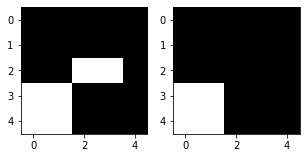

In [4]:
input_image = np.array((
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 255, 255, 0],
    [255, 255, 0, 0, 0],
    [255, 255, 0, 0, 0]), dtype="uint8")
pruned = prune(input_image)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(5,5))
ax1.imshow(input_image, 'gray')
ax2.imshow(pruned, 'gray')

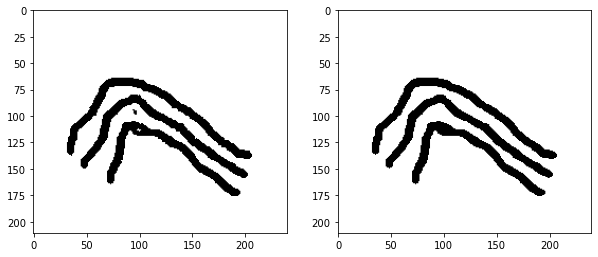

In [5]:
img = cv2.imread("spur-islands-and-holes.png", cv2.IMREAD_GRAYSCALE);
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
close_e = cv2.morphologyEx(prune(img_bin), cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)))
open_e = cv2.morphologyEx(close_e, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)))
 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(img, 'gray')
ax2.imshow(open_e, 'gray')

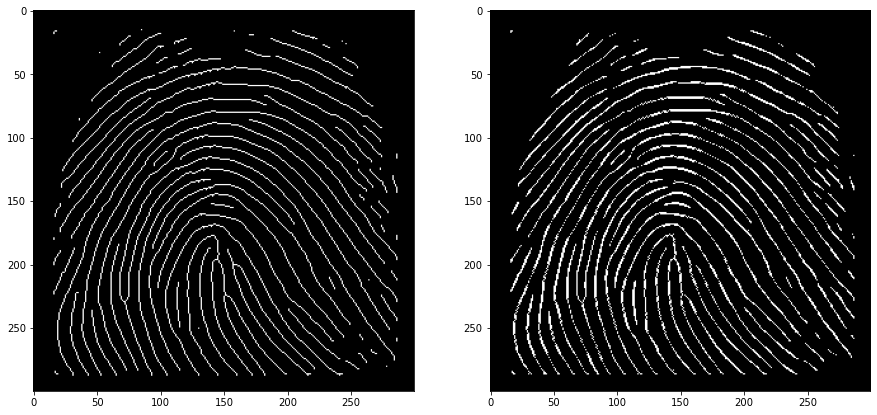

In [6]:
thinned_img = thin(preprocessed_img)
skeleton_img = skeleton(preprocessed_img)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(thinned_img, 'gray')
ax2.imshow(skeleton_img, 'gray')

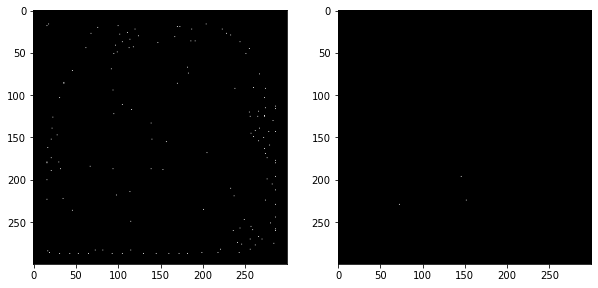

In [7]:
terminations = extract_ridge(thinned_img, ridge_terminations_kernel)
bifurcations = extract_ridge(thinned_img, ridge_bifurcations_kernel)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(terminations, 'gray')
ax2.imshow(bifurcations, 'gray')